In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sinc
from scipy.signal.windows import hamming
from scipy.signal import lfilter

In [20]:
# ex01 Parameters
f1 = 0.5e3
f2 = 0.6e3
fs = 10e3
Ts = 1 / fs
tlen = 0.5
t = np.arange(0, tlen, Ts)
N = len(t)

# Parameters
f1 = 0.5e3
fs = 10e3
fcf = f1 * 1.1
Omegacf = 2 * np.pi * fcf / fs
M = 101
n = np.arange(0, M) - np.floor(M / 2)
h = Omegacf / np.pi * np.sinc(n * Omegacf / np.pi)
w = hamming(M)
# w = np.ones(M)  # Uncomment this line if you want to use a rectangular window
A = 1
B = h * w

In [24]:
# Signals from ex01
x = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)
standev = 1
n = np.random.randn(N) * standev
xn = x + n

In [22]:
# Filter the signal
y = lfilter(B, A, xn)

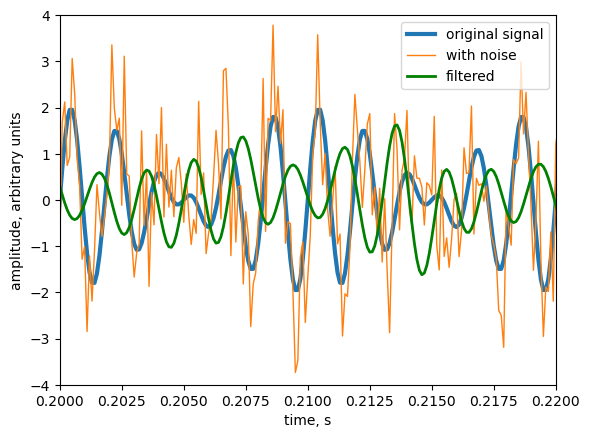

In [23]:
# Plotting
plt.plot(t, x, linewidth=3, label='original signal')
plt.plot(t, xn, linewidth=1, label='with noise')
plt.plot(t, y, 'g', linewidth=2, label='filtered')
plt.axis([1/f1*100, 1/f1*110, -4, 4])
plt.xlabel('time, s')
plt.ylabel('amplitude, arbitrary units')
plt.legend()
plt.show()